In [8]:
from matplotlib.colors import hsv_to_rgb
from numpy.core.memmap import dtype
import cv2
from matplotlib import pyplot as plt
import numpy as np
import time as t
im_bgr = cv2.imread(r"D:\ECE558\ECE558-HW01\ECE558-HW01\wolves.png",1) # 
im_grey = cv2.imread(r"D:\ECE558\ECE558-HW01\ECE558-HW01\wolves.png",0)

ihsv = cv2.cvtColor(im_bgr, cv2.COLOR_BGR2HSV) #hsv
ilab = cv2.cvtColor(im_bgr, cv2.COLOR_BGR2Lab) #lab

def histogram(img,bins,title):
    plt.hist(img.ravel(),bins);
    plt.title(title)
    plt.xlabel('Pixel Values')
    plt.ylabel('Number of Pixels')
    plt.show()


In [21]:
im_grey = cv2.imread(r"D:\ECE558\ECE558-HW01\ECE558-HW01\wolves.png",0)
imgrey = np.array(im_grey,dtype='int32')
def neighbor(mat,q):
    height,width= im_grey.shape
    z = np.zeros((height,width),dtype='int32')
    for i in range(height):
        for j in range(width):
            if i+q[0]<height and j+q[1]<width and i+q[0]>0 and j+q[1]>0:
                z[i,j] += (mat[i,j]-mat[i+q[0],j+q[1]])**2
    return z


Time taken by the function is 1.121391773223877 Sec



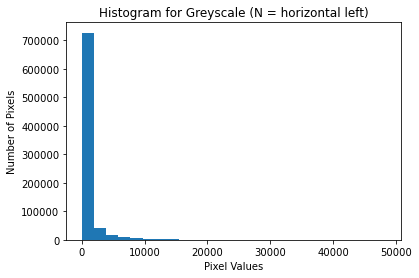

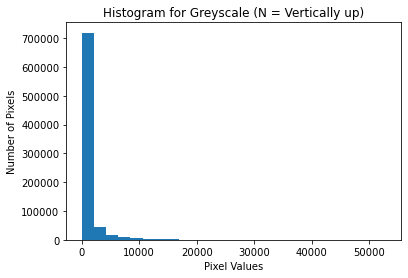

In [23]:
#Intensity 
t0 = t.time()
g1 = neighbor(imgrey,[0,-1])
t1 =t.time()
g2 = neighbor(imgrey,[-1,0])

# calculate histogram 
print(f'Time taken by the function is {t1-t0} Sec\n')

histogram(g1,25,'Histogram for Greyscale (N = horizontal left)')
histogram(g2,25,'Histogram for Greyscale (N = Vertically up)')


In [16]:

def neighbor_3d(mat,q):
  height,width,depth= mat.shape
  img = np.array(mat,dtype='int32')
  u = np.zeros((height,width),dtype='int32')
  for i in range(height):
    for j in range(width):
      for k in range(depth):
        if i+q[0]<height and j+q[1]<width and i+q[0]>=0 and j+q[1]>=0:
          u[i,j] += np.square(img[i,j,k]-img[i+q[0],j+q[1],k])
  return u

Time taken by the function is 6.551021099090576 Sec


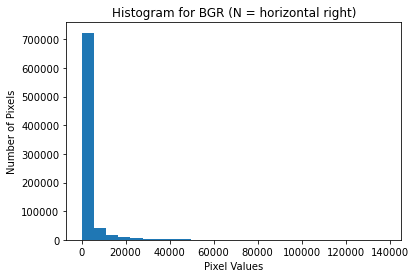

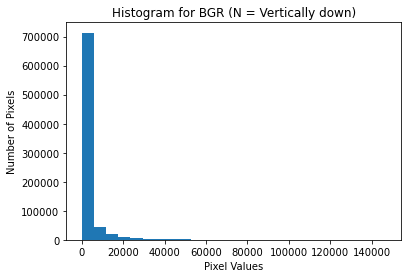

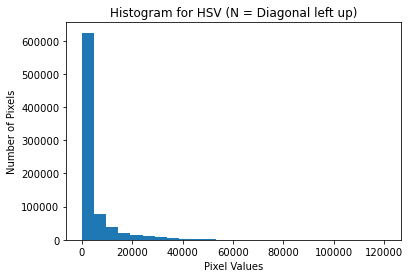

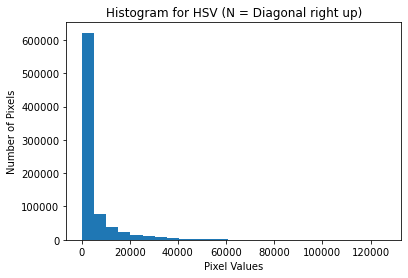

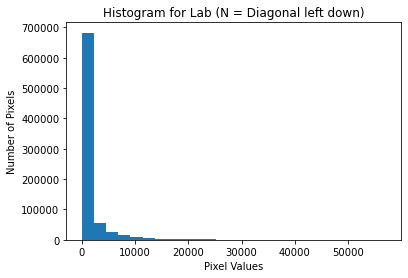

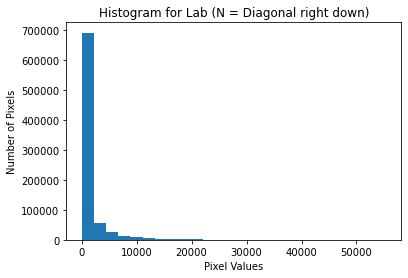

In [17]:
t0 = t.time()
bgr1 = neighbor_3d(im_bgr,[0,1])
t1 = t.time()
bgr2 = neighbor_3d(im_bgr,[1,0])

hsv1 = neighbor_3d(ihsv,[-1,-1])
hsv2 = neighbor_3d(ihsv,[-1,1])

lab1 = neighbor_3d(ilab,[1,-1])
lab2 = neighbor_3d(ilab,[1,1])


# calculate histogram 

print(f'Time taken by the function is {t1-t0} Sec')

histogram(bgr1,25,'Histogram for BGR (N = horizontal right)')
histogram(bgr2,25,'Histogram for BGR (N = Vertically down)')

histogram(hsv1,25,'Histogram for HSV (N = Diagonal left up)')
histogram(hsv2,25,'Histogram for HSV (N = Diagonal right up)')

histogram(lab1,25,'Histogram for Lab (N = Diagonal left down)')
histogram(lab2,25,'Histogram for Lab (N = Diagonal right down)')
